In [1]:
#!pip install torchvision

In [2]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import torch
from torch import nn
from torchvision.models import resnet50, resnet101
import torchvision.transforms as T
torch.set_grad_enabled(False);
import torch.nn.functional as F
from collections import OrderedDict
from torchvision import datasets, models, transforms
import json

import resnet101_backbone
from visualize_attention_maps import model_pass, visualize_attention_maps

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
torch.cuda.empty_cache()

In [4]:
#torch.cuda.memory_allocated()

In [5]:
detr = resnet50_backbone.DETRdemo(num_classes=91)
state_dict = torch.hub.load_state_dict_from_url(
    url='https://dl.fbaipublicfiles.com/detr/detr_demo-da2a99e9.pth',
    map_location='cpu', check_hash=True)
detr.load_state_dict(state_dict)
detr.eval();

AttributeError: module 'resnet101_backbone' has no attribute 'DETRdemo'

In [6]:
for param in detr.backbone.parameters():
  param.requires_grad = False

In [8]:
model = resnet101_backbone.ClassifierHead(model=detr.backbone,encoder=detr.transformer.encoder,
                                         conv=detr.conv, query_pos=detr.query_pos,
                                         col_embed=detr.col_embed,row_embed=detr.row_embed,
                                         size = 400, num_classes=398)
#model = model.eval()

In [ ]:
#for param in model.parameters():
#    print(param.requires_grad)

In [11]:
#url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
url = 'https://ogden_images.s3.amazonaws.com/www.timesrepublican.com/images/2019/05/02231710/Fox-WEB-1100x739.jpg'

im = Image.open(requests.get(url, stream=True).raw)

outputs, sattn, f_map = model_pass(im,model)

Encoder attention:       torch.Size([13, 13, 13, 13])
Feature map:             torch.Size([1, 2217, 13, 13])
Output shape:            torch.Size([1, 398])


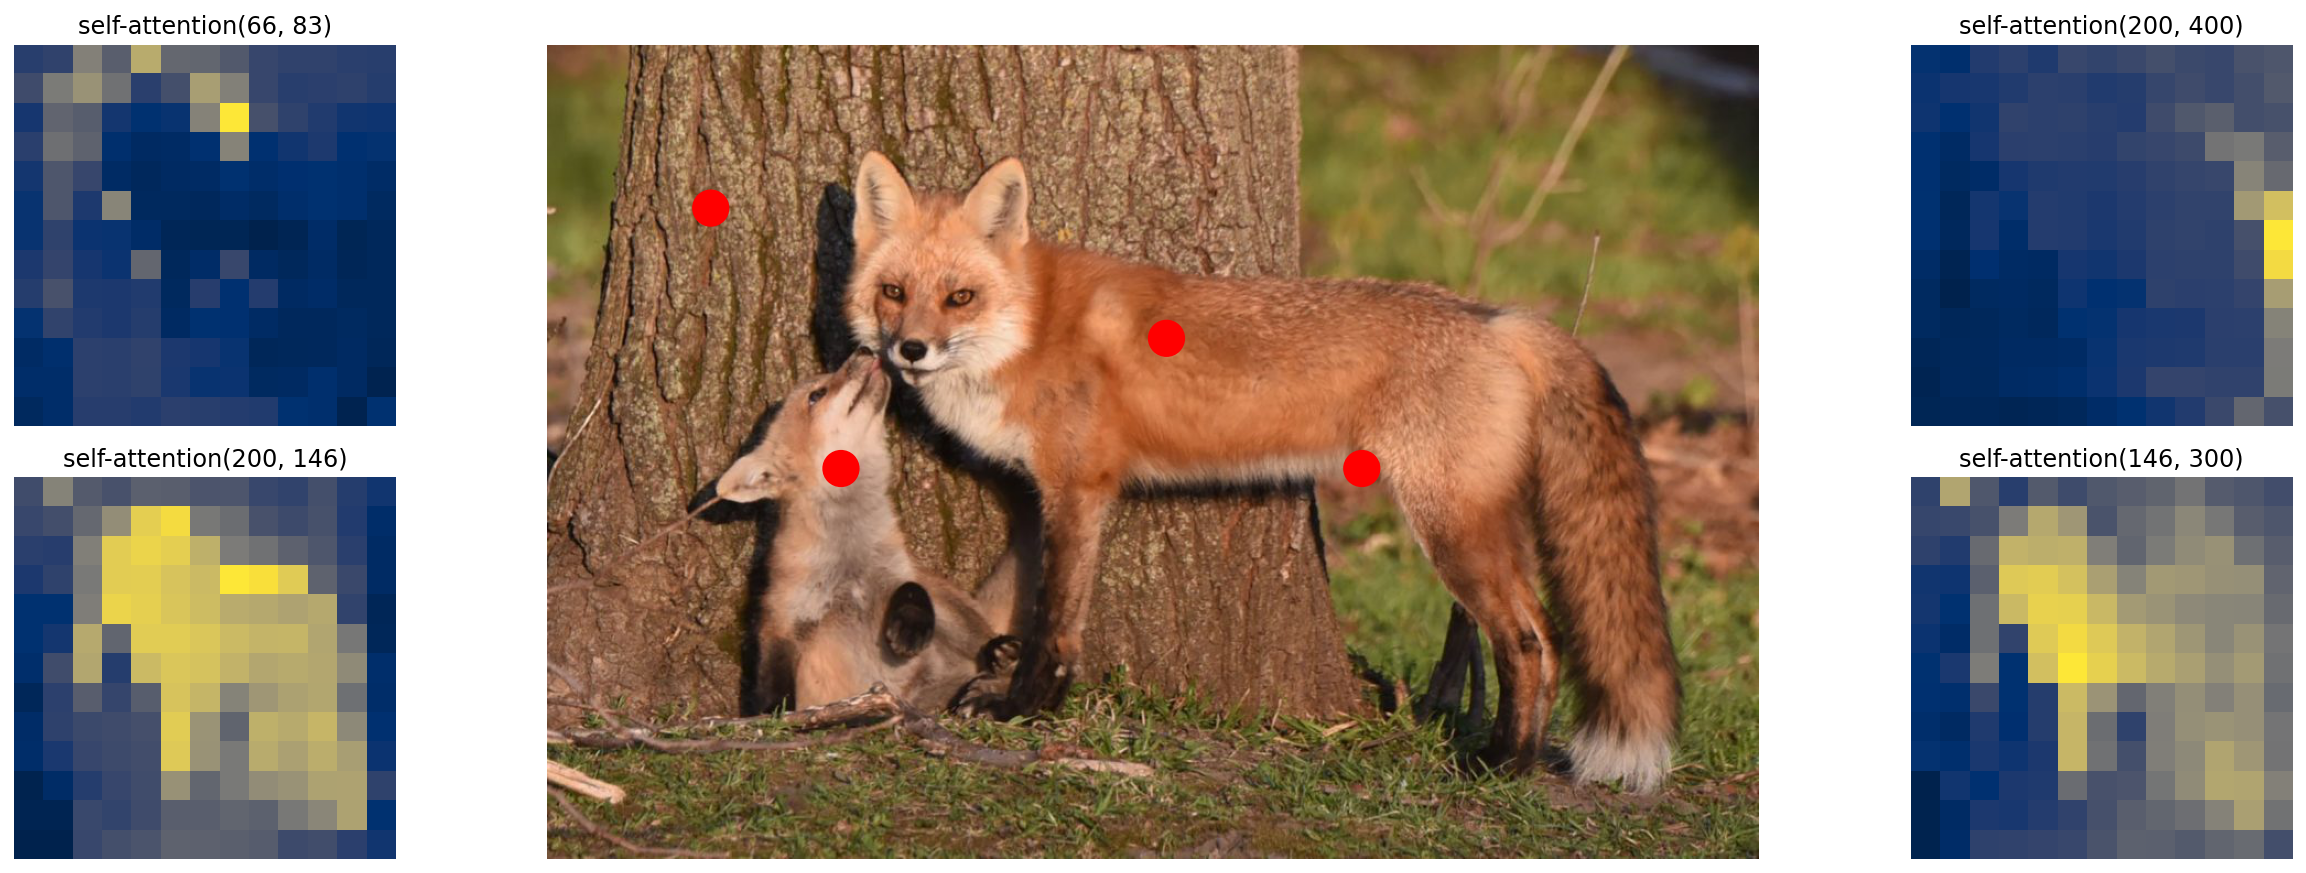

In [14]:
visualize_attention_maps(im,3,sattn)

In [11]:
from torchvision import datasets, transforms, models
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import os
import copy
import training

In [12]:
model_ft = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [13]:
model_ft = training.train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       device, num_epochs=25)

Epoch 0/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 1/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 2/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 3/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 4/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 5/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 6/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 7/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 8/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 9/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 10/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 11/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.0066

Epoch 12/24
----------
train Loss: nan Acc: 0.0025
val Loss: nan Acc: 0.00

NameError: name 'best_model_wts' is not defined